# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn

# 1.Importing

In [36]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2.Load Dataset

In [37]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset contains 150 samples of iris flowers, with three species:

- Iris setosa
- Iris versicolor
- Iris virginica

The target variable consists of three classes corresponding to the three iris species, making it a multiclass classification problem.

# 3.Extract Features

In [39]:
X = df
y = iris.target

# 4.Preprocess Data

# 5.Split the Data into Training and Test Sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6.Create Model

In [41]:
model = GaussianNB()

# 7.Train the Model

In [42]:
model.fit(X_train, y_train)

GaussianNB()

# 8.Make Predictions

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 8.1 Custom Prediction

In [45]:
new_data=pd.DataFrame([{
    'sepal_length': 5.5,
    'sepal_width': 2.4,
    'petal_length': 3.8,
    'petal_width': 1.1
} ])
new_prediction = model.predict(new_data)
classes = ["Setosa", "Versicolor", "Virginica"]
print(f"Predicted Flower: {classes[new_prediction[0]] if new_prediction[0] in range(len(classes)) else 'None' }")

Predicted Flower: Versicolor


## 8.2 Why Naive Bayees used for?
Naive Bayees is used for multiclass class classification, unlike logistic regression there have multiple class for input variable, for a set of input variable naive bayees just predict which class belong among multiple class for those input variables.

# 9 Evaluation Metrics

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

## 9.1 `average` parameter
The `average` parameter is used in metrics that summarize the performance across multiple classes. It determines how to combine the results from multiple classes into a single score. Here are the common options:

- `None`: The function returns scores for each class individually (e.g., precision, recall, or F1 score for each class).

- `micro`: Calculates metrics globally by counting the total true positives, false negatives, and false positives. This treats all classes equally regardless of their support (the number of true instances for each class).

- `macro`: Calculates metrics for each class independently and then takes the average. This gives equal weight to each class, which means that the performance on less frequent classes has the same influence as the more frequent classes.

- `weighted`: Similar to macro, but the average is weighted by the number of true instances (support) for each class. This means that classes with more instances have a greater influence on the final score.

## 9.2 `multi_class` paramter
The `multi_class` parameter is used in certain metrics to specify how to handle multiclass targets. It allows you to choose a strategy for calculating metrics for multiclass classification problems. Common options include:

- `ovr` (One-vs-Rest): This strategy treats each class as a binary classification problem. For each class, it calculates the metric as if that class is the positive class and all others are negative. This is often the default setting for metrics in binary classification.

- `ovo` (One-vs-One): This strategy computes the metric for every pair of classes. It evaluates the model on each class pair, which can provide more insight but is more computationally intensive.

In [47]:
print(f"Accuracy  : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall    : {recall}")
print(f"F1-Score  : {f1}")
print(f"ROC-AUC   : {roc_auc}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1-Score  : 1.0
ROC-AUC   : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 10. Visualization

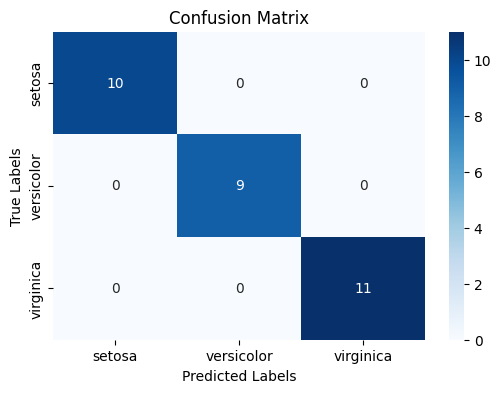

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

__Explanation of Confusion Matrix:__
- Each row represents the actual class, and each column represents the predicted class.
- Diagonal elements show correct predictions.
- Off-diagonal elements indicate misclassifications (errors).

For example, if the true class is setosa and it’s predicted as setosa, it will appear on the diagonal of the matrix. If it’s predicted as versicolor, it will appear as an off-diagonal value, contributing to misclassification.